In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

##### 1.Importing a DataFrame #####

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test =  pd.read_csv("../data/test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### 2.Visualize the Data #####

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Number')

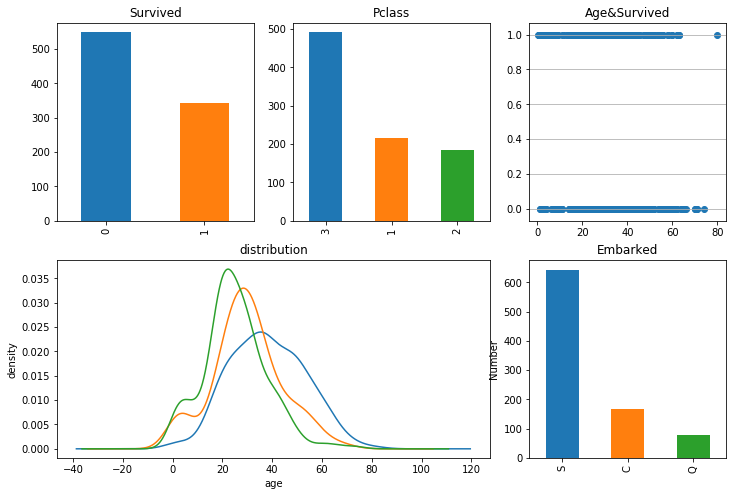

In [6]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(12,8))

#Survived
plt.subplot2grid((2,3),(0,0))
df_train['Survived'].value_counts().plot(kind="bar")
plt.title("Survived")

#Pclass
plt.subplot2grid((2,3),(0,1))
df_train['Pclass'].value_counts().plot(kind="bar")
plt.title("Pclass")

#Age&Survived
plt.subplot2grid((2,3),(0,2))
plt.scatter( df_train.Age,df_train.Survived)
plt.grid(b=True, which='major', axis='y')
plt.title("Age&Survived")

#Age
plt.subplot2grid((2,3),(1,0), colspan=2)
df_train.Age[df_train.Pclass==1].plot(kind="kde")
df_train.Age[df_train.Pclass==2].plot(kind="kde")
df_train.Age[df_train.Pclass==3].plot(kind="kde")
plt.xlabel("age")
plt.ylabel("density") 
plt.title("distribution")

plt.subplot2grid((2,3),(1,2))
df_train.Embarked.value_counts().plot(kind='bar')
plt.title("Embarked")
plt.ylabel("Number")  

<Figure size 432x288 with 0 Axes>

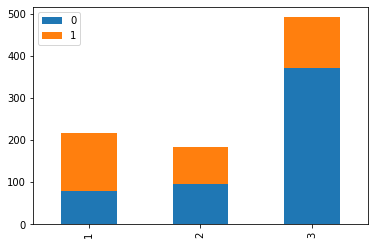

In [7]:
#Pclass&Survived
fig2 = plt.figure()
survived_0 = df_train.Pclass[df_train.Survived==0].value_counts()
survived_1 = df_train.Pclass[df_train.Survived==1].value_counts()
df_survived=pd.DataFrame({'1':survived_1, '0':survived_0})
df_survived.plot(kind="bar", stacked=True)

<Figure size 432x288 with 0 Axes>

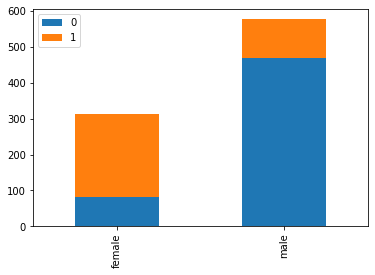

In [8]:
#Sex&Survived
fig3 = plt.figure()
survived_sex_0 = df_train.Sex[df_train.Survived==0].value_counts()
survived_sex_1 = df_train.Sex[df_train.Survived==1].value_counts()
df_sex_survived=pd.DataFrame({'1':survived_sex_1, '0':survived_sex_0})
df_sex_survived.plot(kind="bar", stacked=True)

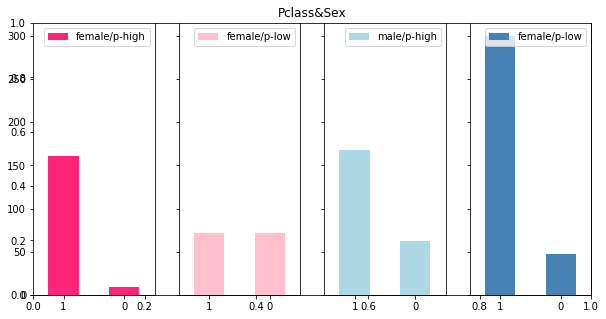

In [9]:
fig4=plt.figure(figsize=(10,5))
plt.title("Pclass&Sex")

ax1=fig4.add_subplot(141)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["1", "0"], rotation=0)
ax1.legend(["female/p-high"], loc='best')

ax2=fig4.add_subplot(142, sharey=ax1)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["female/p-low"], loc='best')

ax3=fig4.add_subplot(143, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["male/p-high"], loc='best')

ax4=fig4.add_subplot(144, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["female/p-low"], loc='best')

plt.show()

In [10]:
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts()

0    300
1     47
Name: Survived, dtype: int64

<Figure size 432x288 with 0 Axes>

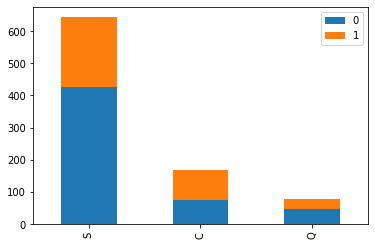

In [11]:
#Embarked&Survived
fig4 = plt.figure()

survived_embarked_0 = df_train.Embarked[df_train.Survived==0].value_counts()
survived_embarked_1 = df_train.Embarked[df_train.Survived==1].value_counts()

df_survived_embarked = pd.DataFrame({'0':survived_embarked_0,'1':survived_embarked_1})
df_survived_embarked.plot(kind="bar",stacked=True)

In [12]:
g= df_train.groupby(['SibSp','Survived'])
g.count()['PassengerId']

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

In [13]:
g= df_train.groupby(['Parch','Survived'])
g.count()['PassengerId']

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

<Figure size 432x288 with 0 Axes>

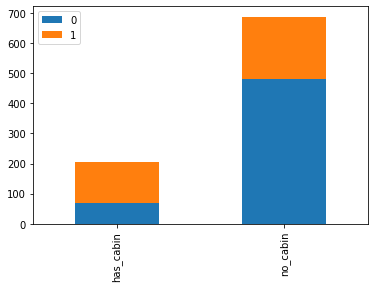

In [14]:
#Cabin&Survived
fig5 = plt.figure()
survived_no_cabin = df_train.Survived[pd.isnull(df_train.Cabin)].value_counts()
survived_has_cabin = df_train.Survived[pd.notnull(df_train.Cabin)].value_counts()

df_cabin = pd.DataFrame({'no_cabin':survived_no_cabin,'has_cabin':survived_has_cabin})
df_cabin_survived = df_cabin.T
df_cabin_survived.plot.bar(stacked=True)

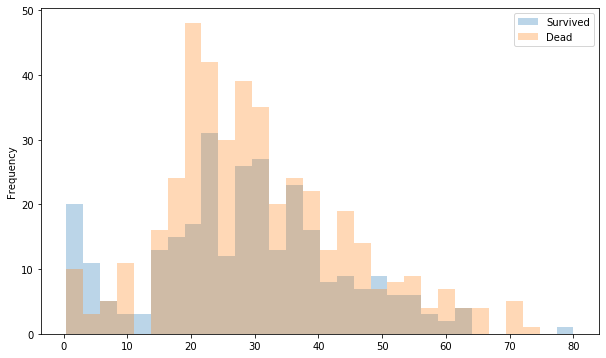

In [15]:
survived_age=df_train[df_train.Survived==1]['Age']  
dead_age=df_train[df_train.Survived==0]['Age']  
age_frame=pd.concat([survived_age,dead_age],axis=1)  
age_frame.columns=['Survived','Dead']  
age_frame.plot(kind='hist',bins=30,alpha=0.3,figsize=(10,6))

##### 3.Cleanup and Transform the Data(Feature Engineering) #####

In [16]:
#set missing age method
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    #  df.values　→ Return a Numpy representation of the DataFrame.(version 0.23: to_numpy() is recommended)
    #  print(age_df.values)
    # df.as_matrix()→ transfer dataframe to numpy(version 0.23.0: Use DataFrame.values() instead.)
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    # y_target（column_1 age）
    y = known_age[:, 0]
    # X_Features（column_2~N）
    X = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df,rfr

In [17]:
def age_bins(age):
    if age<=6:
        return "Child"
    if age>10 and age<= 35:
        return "Youth"
    if age > 35 and age <= 60:
        return "Middle"
    else:
        return "Old"

In [18]:
#extract prefix of cabin when cabin is not null
import math
def get_cabin_prefix(cabin):
    if str(cabin) != 'nan':
        return str(cabin)[0:1]

In [19]:
#set missing cabin method-1
def set_cabin_type1(df):
    df.loc[(df['Cabin'].notnull()), 'Cabin'] = "Yes"
    df.loc[(df['Cabin'].isnull()), 'Cabin'] = "No"
    return df

In [20]:
#set missing cabin method-2
def get_cabin_no(s):
    cabinno = s[1:]
    if ' ' in cabinno:
        cabinno =  cabinno.split(sep=' ')[0]
    if ' ' in cabinno or cabinno=='':
            cabinno = 0
    return int(cabinno)

def set_cabin_type2(df):
    df['Cabin_1']=df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: x[0:1])
    df['Cabin_2']=df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: get_cabin_no(x))
    df.loc[(df['Cabin_2'].isnull()),'Cabin_2']=0
    return df

In [21]:
#add child feature
def add_child(age):
    child_flg = 0
    if age <=6:
        child_flg= 1
    return child_flg

In [22]:
#add mother feature
def add_mother(title, parch):
    mother_flg = 0
    if title=='Mrs' and parch>1:
        mother_flg =1
    return mother_flg

In [23]:
# Sex&Pclass
def get_female_highclass(sex, pclass):
    flg = 0
    if sex=='female' and pclass!=3:
        flg = 1
    return flg

def get_male_lowclass(sex, pclass):
    flg = 0
    if sex=='male' and pclass==3:
        flg = 1
    return flg

In [24]:
# extract prefix of title
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles(df):
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    df['Title'] = df.Title.map(Title_Dictionary)
    return df

In [25]:
#add feature family category 
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 3:
        return 'Small'
    else:
        return 'Large'

In [26]:
#add feature ticket category
def ticket_category(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [27]:
#combine train data and test data
df_test['Survived'] = 0
df_combine=pd.concat([df_train,df_test])
df_combine.shape

(1309, 12)

In [28]:
# Process Fare
df_combine.Fare.fillna(df_combine.Fare.mean(), inplace=True)

df_combine['Group_Ticket'] = df_combine['Fare'].groupby(by=df_combine['Ticket']).transform('count')
df_combine['Fare'] = df_combine['Fare'] / df_combine['Group_Ticket']
df_combine.drop(['Group_Ticket'], axis=1, inplace=True)

def fare_category(fare):
    if fare <= 4:
        return 0
    elif fare <= 10:
        return 1
    elif fare <= 30:
        return 2
    elif fare <= 45:
        return 3
    else:
        return 4

df_combine['FareCategory'] = df_combine['Fare'].map(fare_category)

#Fare→Log
# df_combine['Fare'] = df_combine.Fare.apply(lambda x: np.log(x)  if x!=0 else x)

In [29]:
# Process Ticket
df_combine['Ticket'] = df_combine['Ticket'].map(ticket_category)

In [30]:
#Process Age 
df_combine,rfr = set_missing_age(df_combine)
df_combine['AgeCategory'] = df_combine.Age.map(age_bins)

In [31]:
#Process CabinPrefix
df_combine['PrefixCabin'] = df_combine['Cabin'].apply(lambda x : get_cabin_prefix(x))

In [32]:
#Fillna Cabin
df_combine = set_cabin_type1(df_combine)

In [33]:
#Fillna Embarked
df_combine.loc[df_combine['Embarked'].isnull(),'Embarked'] = df_combine['Embarked'].mode()[0]

In [34]:
#Add Feature Sex&Pclass
df_combine['FemaleHighClass'] =  df_combine.apply(lambda x: get_female_highclass(x.Sex,x.Pclass), axis=1)
df_combine['MaleLowClass'] =  df_combine.apply(lambda x: get_male_lowclass(x.Sex,x.Pclass), axis=1)

In [35]:
# Add Feature FamilyCategory(Parch+SibSp)
from sklearn import preprocessing
df_combine['FamilySize'] = df_combine['Parch'] + df_combine['SibSp'] + 1
df_combine['FamilyCategory'] = df_combine['FamilySize'].map(family_size_category)

In [36]:
#Add Feature Title
# # 第一次extract处理是：匹配正则表达式中的“，”的位置，并将“（）”括号中的部分抽出来，在下式中也就是“，” Name字段里“逗号”后面的部分截取留下来
# #第二次extract处理是：匹配正则表达式中的“.”的位置，并将“（）”括号中的部分抽出来，在下式中也就是“.”Name字段里点前面的部分截取留下来
# #（）代表匹配后被留下里的部分
# df_combine['Title'] = df_combine['Name'].str.extract('.+,(.+)').str.extract( '^(.+?)\.').str.strip()
# df_combine['Title'] = df_combine['Title'].map(create_title_dict())

df_combine = get_titles(df_combine)

In [37]:
#Add Feature Child 
df_combine['Child'] = df_combine['Age'].apply(lambda x: add_child(x))

In [38]:
#Add Feature Mother
df_combine['Mother'] = df_combine.apply(lambda x: add_mother(x.Title,x.Parch), axis=1)

In [39]:
#Extracting dummy variables
#one-hot encoding
dummy_Cabin = pd.get_dummies(df_combine.Cabin,  prefix="Cabin")
dummy_Embarked = pd.get_dummies(df_combine['Embarked'],  prefix="Embarked")
dummy_Sex = pd.get_dummies(df_combine['Sex'], prefix="Sex")
dummy_Pclass =pd.get_dummies(df_combine['Pclass'], prefix="Pclass")
dummy_Title =pd.get_dummies(df_combine['Title'], prefix="Title")
dummy_FamilyCategory = pd.get_dummies(df_combine['FamilyCategory'],prefix="FamilyCategory")
dummy_FareCategory = pd.get_dummies(df_combine['FareCategory'],prefix="FareCategory")
dummy_PrefixCabin = pd.get_dummies(df_combine['PrefixCabin'],prefix='PrefixCabin')
dummy_AgeCategory = pd.get_dummies(df_combine['AgeCategory'],prefix="AgeCategory")
dummy_Ticket =pd.get_dummies(df_combine['Ticket'], prefix="Ticket")

In [40]:
df_combine= pd.concat([df_combine, dummy_Cabin,dummy_Embarked,dummy_Sex,dummy_Pclass,dummy_Title,dummy_FamilyCategory,dummy_FareCategory,dummy_PrefixCabin,dummy_AgeCategory,dummy_Ticket]
                      , axis=1)
df_combine.shape

(1309, 95)

<Figure size 432x288 with 0 Axes>

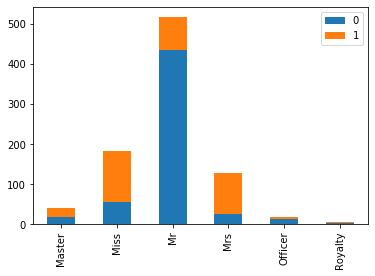

In [41]:
#Title&Survived
fig7 = plt.figure()

df_train_fig = df_combine[:891]

survived_title_0 = df_train_fig.Title[df_train_fig.Survived==0].value_counts()
survived_title_1 = df_train_fig.Title[df_train_fig.Survived==1].value_counts()

df_survived_title = pd.DataFrame({'0':survived_title_0,'1':survived_title_1})
df_survived_title.plot(kind="bar",stacked=True)

In [42]:
#Scaler
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

# df_combine['Age_scaled']= scaler.fit(df_combine[['Age']]) .transform(df_combine[['Age']])
# df_combine['Fare_scaled'] = scaler.fit(df_combine[['Fare']]).transform(df_combine[['Fare']])

##### 4.Split Training and Test Sets #####

In [43]:
#Properity
prop_regex = 'Survived|AgeCategory_.*|FamilySize|FamilyCategory_.*|Fare_.*|Cabin_.*|Sex_.*|Pclass_.*|Child|Mother|PrefixCabin_.*|Title_.*|Embarked_.*|Ticket_.*'
df_combine_filter = df_combine.filter(regex=prop_regex)

cols = list(df_combine_filter)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Survived')))
# reorder
df_combine_filter = df_combine_filter.loc[:, cols]
print(df_combine.shape)
print(df_combine_filter.shape)
print(df_combine_filter.columns)

df_train_new = df_combine_filter[ :891]
df_test_new = df_combine_filter[ 891:]

train_X = df_train_new.drop(columns=['Survived'])
train_Y = df_train_new['Survived']

test_X = df_test_new.drop(columns=['Survived'])

(1309, 95)
(1309, 72)
Index(['Survived', 'FamilySize', 'Child', 'Mother', 'Cabin_No', 'Cabin_Yes',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'FamilyCategory_Large', 'FamilyCategory_Single', 'FamilyCategory_Small',
       'PrefixCabin_A', 'PrefixCabin_B', 'PrefixCabin_C', 'PrefixCabin_D',
       'PrefixCabin_E', 'PrefixCabin_F', 'PrefixCabin_G', 'PrefixCabin_T',
       'AgeCategory_Child', 'AgeCategory_Middle', 'AgeCategory_Old',
       'AgeCategory_Youth', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON',
       'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP',
       'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Tic

In [44]:
# print(df_combine_filter[['Sex_female','Survived']].corr())
# print(df_combine_filter[['Title_Master','Survived']].corr())

##### 4.Feature Selection ##### 

In [45]:
select_clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
select_clf.fit(train_X, train_Y)

features = pd.DataFrame()
features['feature'] = train_X.columns
features['importance'] = select_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

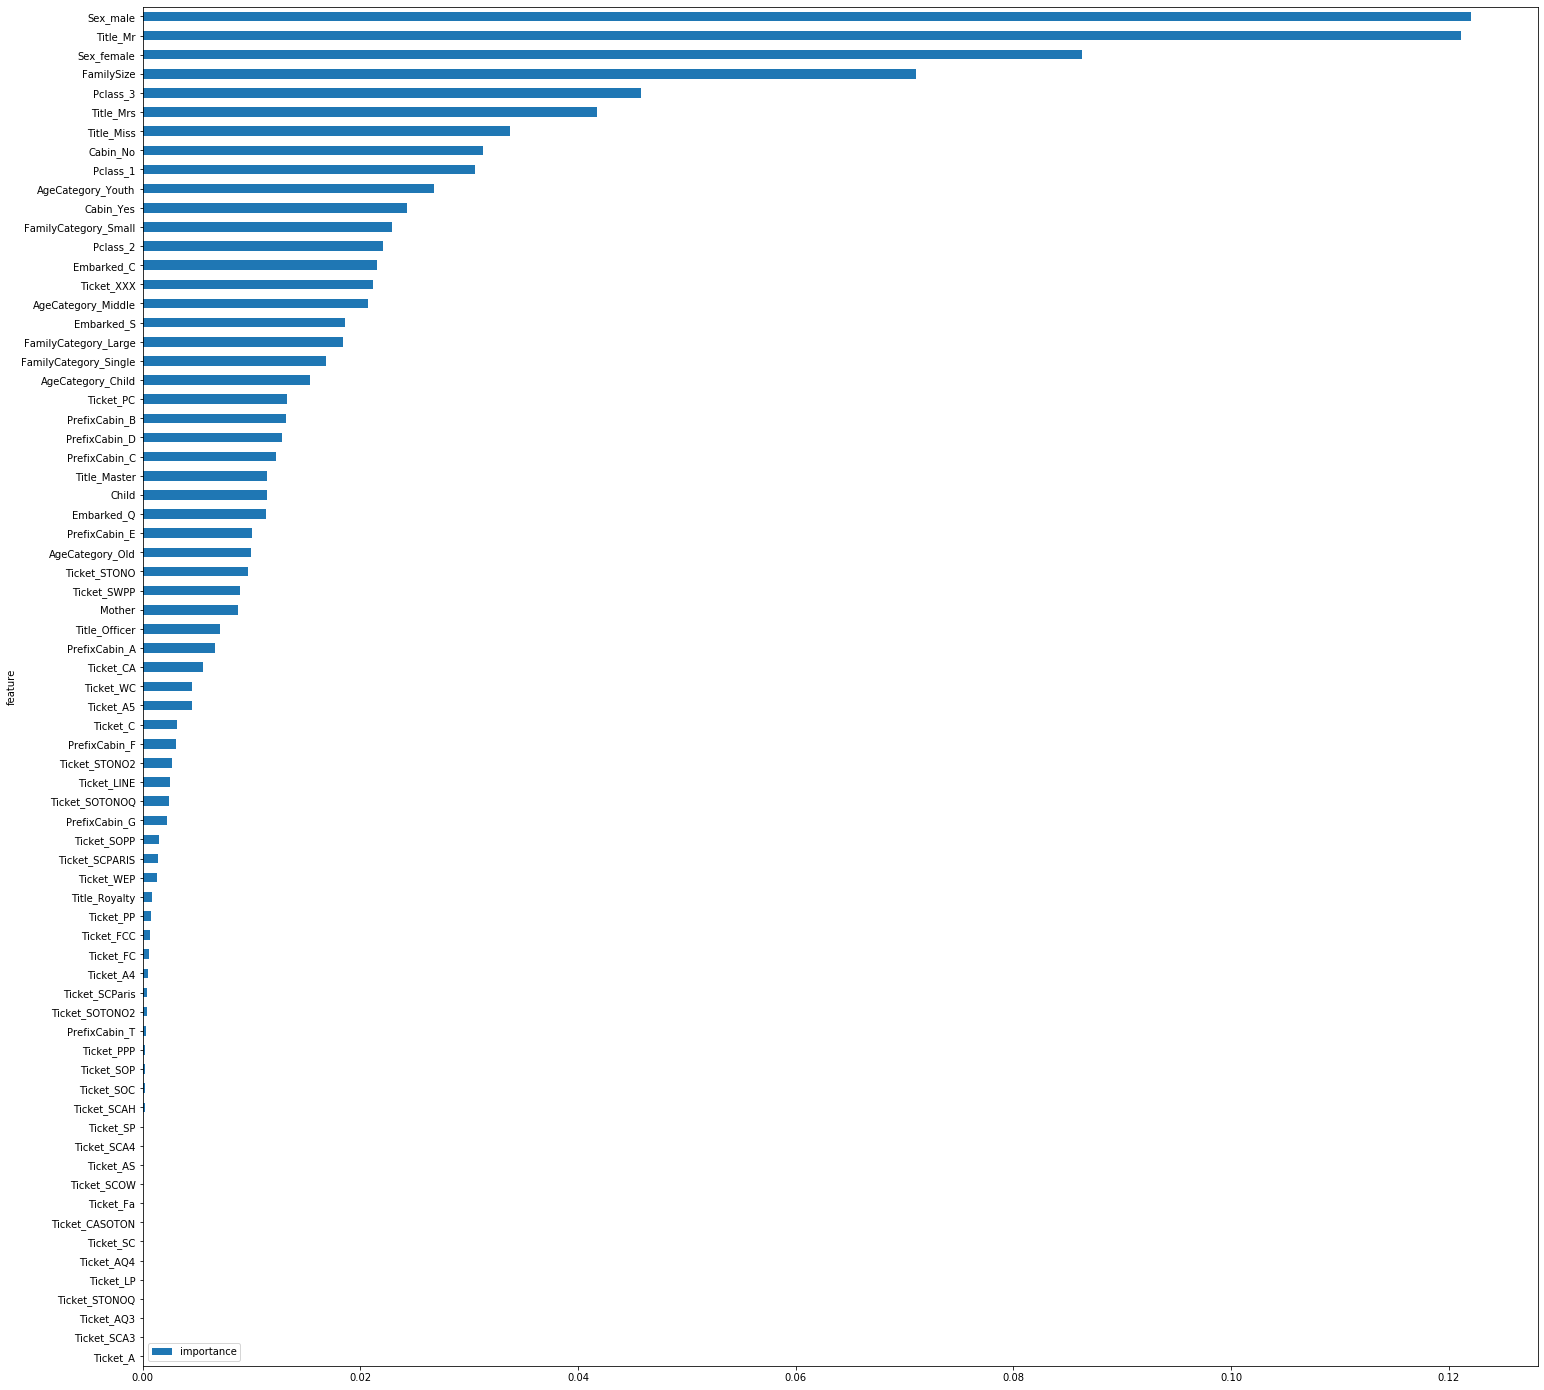

In [46]:
features.plot(kind='barh', figsize=(25, 25))

In [47]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(select_clf, prefit=True,threshold=0.012)
recude_train= model.transform(train_X)
# print(model.threshold)
print(recude_train.shape)

(891, 24)


In [48]:
recude_test = model.transform(test_X)
recude_test.shape

(418, 24)

##### 5.Fine Tune Algorithms ##### 

In [49]:
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
import numpy as np

y = train_Y.values
X = recude_train

#LogisticRegression
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

# bagging_clf = BaggingRegressor(clf, n_estimators=10, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
# bagging_clf.fit(X, y)

clf.fit(X, y)

predictions = clf.predict(recude_test)
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("../data/lr_predictions.csv", index=False)

In [50]:
# coef=pd.DataFrame({"columns":list(train_X.drop(columns=['Survived']).columns), "coef":list(clf.coef_[0].T)})

# coef=pd.DataFrame({"columns":list(train_X.columns), "coef":list(clf.coef_[0].T)})
# coef.sort_values(by='coef', ascending=False)


##### 6. Cross Validate with KFold #####

In [51]:
#cross validation
from sklearn import cross_validation

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
y_cross = train_Y.values
X_cross = recude_train

cross_rlt = cross_validation.cross_val_score(clf, X_cross, y_cross, cv=5)
print(cross_rlt)
print(cross_rlt.mean())

[ 0.80446927  0.82681564  0.80337079  0.80898876  0.8079096 ]
0.810310814257


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
train_data = df_combine[ :891]
cross_train,cross_test= cross_validation.train_test_split(train_data, test_size=0.3, random_state=0)

cross_train_filter = cross_train.filter(regex=prop_regex)
cross_test_filter = cross_test.filter(regex=prop_regex)

y_cross_train = cross_train_filter['Survived'].values
y_cross_test = cross_test_filter['Survived'].values

cross_train_filter.drop(columns=['Survived'],inplace=True)
cross_test_filter.drop(columns=['Survived'],inplace=True)
X_cross_train = model.transform(cross_train_filter)
X_cross_test = model.transform(cross_test_filter)

clf_cross = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf_cross.fit(X_cross_train, y_cross_train)
predictions = clf_cross.predict(X_cross_test)

result = pd.DataFrame({'PassengerId':cross_test['PassengerId'].as_matrix(), 'SurvivedRlt':predictions.astype(np.int32)})

#Print bad cases
all_test = pd.concat([cross_test.reset_index(drop=True),result.reset_index(drop=True)],axis=1)
bad_cases = all_test.loc[all_test['Survived']!=all_test['SurvivedRlt'],:]
bad_cases

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,PassengerId,SurvivedRlt
5,41.299781,Yes,S,30.500000,"Saalfeld, Mr. Adolphe",0,299,1,male,0,...,0,0,0,0,0,0,0,1,299,0
15,14.000000,No,S,7.854200,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,...,0,0,0,0,0,0,0,1,15,1
24,22.000000,No,S,9.837500,"Strandberg, Miss. Ida Sofia",0,475,3,female,0,...,0,0,0,0,0,0,0,1,475,1
33,42.986540,Yes,S,35.500000,"Woolner, Mr. Hugh",0,56,1,male,0,...,0,0,0,0,0,0,0,1,56,0
40,60.000000,Yes,C,39.600000,"Frolicher-Stehli, Mr. Maxmillian",1,588,1,male,1,...,0,0,0,0,0,0,0,1,588,0
50,38.314627,Yes,S,30.000000,"Hawksford, Mr. Walter James",0,741,1,male,0,...,0,0,0,0,0,0,0,1,741,0
54,46.966304,Yes,C,29.700000,"Marechal, Mr. Pierre",0,840,1,male,0,...,0,0,0,0,0,0,0,1,840,0
59,33.309902,No,Q,7.750000,"McCoy, Mr. Bernard",0,302,3,male,2,...,0,0,0,0,0,0,0,1,302,0
63,39.171295,No,C,39.600000,"Brewe, Dr. Arthur Jackson",0,767,1,male,0,...,0,0,0,0,0,0,0,1,767,1
67,28.000000,No,S,11.000000,"Harper, Rev. John",1,849,2,male,0,...,0,0,0,0,0,0,0,1,849,1


In [53]:
# import xgboost as xgb  
# from sklearn.preprocessing import LabelEncoder

# gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.06,scoring='r3', cv=10, verbose=1, n_jobs=4,)  
# gbm.fit(X, y)  
# # gbm.score(X_test_,Y_test_)

# y_cross = train_Y.values
# X_cross = recude_train

# print(cross_validation.cross_val_score(clf, X_cross, y_cross, cv=5))